<a href="https://www.kaggle.com/code/abdelawwalrashid/haberman-s-survival-exploratory-data-analysis?scriptVersionId=110980958" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploratory Data Analysis of *Haberman's Survival Dataset*

**Index**
1.     What are Axillary Lymph Nodes?
1.     Dataset description
1.     Objective
1.     Import and configure required libraries
1.     Load Dataset using pandas
1.     Features and Label
1.     ED Analysis
1.     Conclusion

**01- What are Axillary Lymph Nodes?**
> The lymph nodes in the armpits are called *axillary lymph nodes*. Axillary lymph nodes are located near the breasts. This means **they are often the first location to which breast cancer spreads** if it moves beyond the breast tissue. There are three surgical levels of axillary lymph nodes.
> 
> The number of axillary lymph nodes can vary from person to person. Typically, a **person has 20 to 30 axillary lymph nodes**.
* https://i.imgur.com/1eO2tBA.png
* https://i.imgur.com/tlh9Fhd.png

**What is Survival rate?**
> Survival rate is a part of survival analysis. It is the percentage of people in a study or treatment group still alive for a given period of time after diagnosis.

**Survival rate in Haberman's Dataset**
> So in this dataset ,whenever an analysis is performed, Survival rate indicates percentage of patients with survival status value being 1.

**02- Dataset description**

**Dataset contains details of 305 patients. There are 4 attributes including the class attribute.**

**Attribute Description :**
1. Age of patient at time of operation (numerical)
1. Patient's year of operation (year - 1900, numerical)
1. Number of positive axillary nodes detected (numerical)
1. Survival status (class attribute)
     * Status is marked 1 if patient survived 5 years or longer.
     * Status is marked 2 if patient died within 5 years.


**03- Objective**

1.     To thoroughly explore the data and the metadata.
1.     Analyze all attributes available in the dataset and quantify Survival rate.
1.     Document the observations seen in the graphical evidence.

**04- Import and configure required libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Data manipulation libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Configure NumPy.
# Set `Line width` to Maximum 130 characters in the output, post which it will continue in next line.
np.set_printoptions(linewidth=130)

# Configure Pandas.
# Set display width to maximum 130 characters in the output, post which it will continue in next line.
pd.options.display.width = 130

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
import plotly
import plotly.express as px
from prettytable import PrettyTable

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/habermans-survival-data-set/haberman.csv


**05- Load Dataset using pandas**

In [2]:
Haberman_df = pd.read_csv('/kaggle/input/habermans-survival-data-set/haberman.csv')
Haberman_df.columns = ['age', 'operation_year', 'Axil_node', 'survived_status']
Haberman_df.head()

,age,operation_year,Axil_node,survived_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
rows, cols = Haberman_df.shape
print("Dataset contains", rows, "rows and", cols, "columns.")

Dataset contains 305 rows and 4 columns.


**Metadata of** DataFrame

In [4]:
Haberman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              305 non-null    int64
 1   operation_year   305 non-null    int64
 2   Axil_node        305 non-null    int64
 3   survived_status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


**What is metadata saying?**
1.     Non-Null Count for all the attributes is 305, which is equal to total number of rows in the dataset, therefore there are **no missing values** in any of the four attributes.
1.     All the four attributes are of **int64 data type**.
1.     As always there is a default index column (by pandas) starting from zero and incremented by one.
1.     Entire dataset consumes **~10 Kilo Byte** of primary memory (RAM).

In [5]:
# We have two classes in survival_status_after_5_years :
# person who is survived after the surgery.
# person who is not survived after the surgery.

Haberman_df['survived_status'].value_counts()

1    224
2     81
Name: survived_status, dtype: int64

**06- Features and Label:**

Here there are 3 features and 1 class attribute
*     age : Age of patient at time of operation
*     year : Patient's year of operation
*     nodes : Number of positive axillary nodes detected in body
*     status:
         * (1) if patient is survived 5 years or longer (224 person)
         * (2) if patient is not survived 5 years or longer (81 person)

In [6]:
Haberman_df['survived_status'] = Haberman_df['survived_status'].map({1:'survived', 2:'dead'})
Haberman_df.tail()

,age,operation_year,Axil_node,survived_status
300,75,62,1,survived
301,76,67,0,survived
302,77,65,3,survived
303,78,65,1,dead
304,83,58,2,dead


In [7]:
Haberman_df['survived_status'].value_counts()

survived    224
dead         81
Name: survived_status, dtype: int64

We can see our dataset is not balanced, as we can see that from total 305 people, 224 people suvived for 5 or more year and 81 of them died within 5 years. 

So :::   224 : 81 is not a balanced pair.

In [8]:
## High Level Statistics
Haberman_df.describe()

,age,operation_year,Axil_node
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


**UNIVARIATE ANALYSIS :**

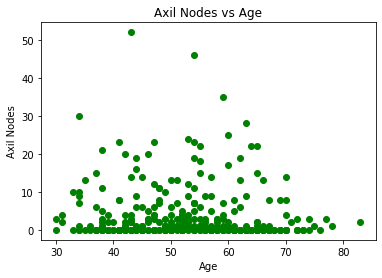

In [9]:
plt.scatter(Haberman_df['age'],Haberman_df['Axil_node'], color = 'g')
plt.xlabel('Age')
plt.ylabel('Axil Nodes')
plt.title('Axil Nodes vs Age')
plt.show()

We can see that there is quite good concentration of data point When Axil Node is 0


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


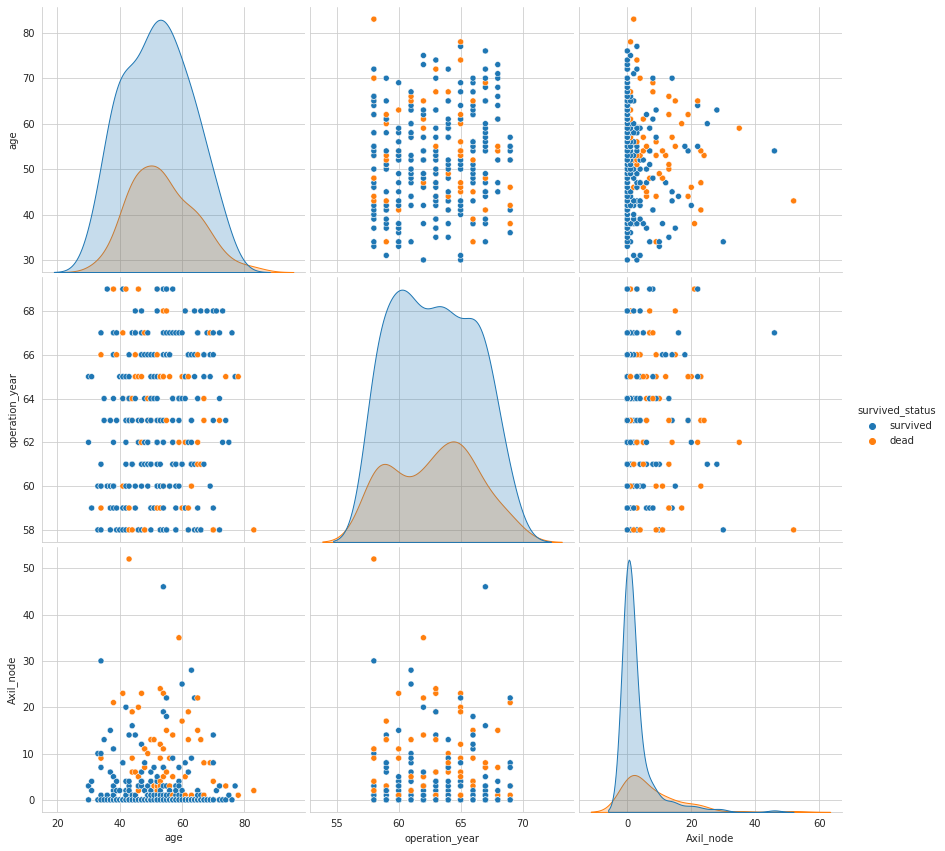

In [10]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(Haberman_df, hue = 'survived_status', size = 4)
plt.show()

**Observations**

1.     Here with this scatter plot we get insight that patients with 0 axil nodes are more likely to survive irrespective to there age.
1.     It is very much less likely to have patients with axil nodes more than 30.
1.     Patients who are older than 50 and have axil nodes greater than 10 are more likely to die.

**Distribution plots:**

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


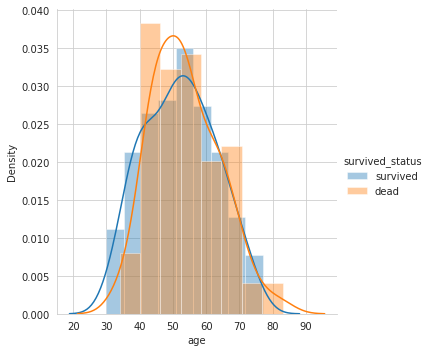

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


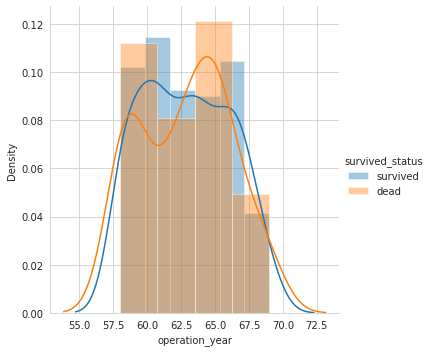

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


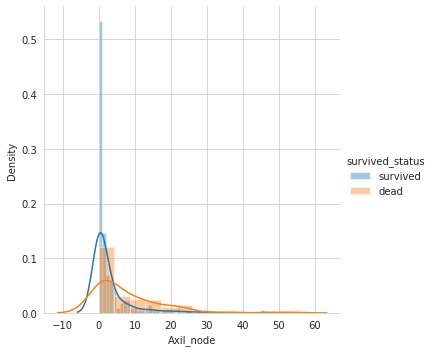

In [11]:
# Distribution plots
"""
* Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points 
lie within that group. (histogram)
* Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the bar denotes the percentage of data points under the corresponding group
"""

for idx, feature in enumerate(list(Haberman_df.columns)[:-1]):
    fg = sns.FacetGrid(Haberman_df, hue='survived_status', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()
    


**Observations:**

*     Large number of patients died whos operation was done in year 60 and 65.
*     This histogram is overlapping each other, but still we can say that people within range of 40-60 are more likely to die.
*     People less than age 40 are more likely to survive.
*     We can conclude that from this histogram (node) that, Patients having 0 axil nodes are more likely to survive.

**PDF - CDF**

[ age ]
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623 0.13442623 0.05901639 0.02295082 0.00655738]
CDF: [0.04918033 0.13770492 0.28852459 0.46229508 0.64262295 0.77704918 0.91147541 0.9704918  0.99344262 1.        ]
[ operation_year ]
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066 0.09180328 0.09180328 0.08196721 0.07868852]
CDF: [0.20655738 0.29836066 0.38360656 0.45901639 0.55737705 0.6557377  0.74754098 0.83934426 0.92131148 1.        ]
[ Axil_node ]
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738 0.00327869 0.         0.00327869 0.00327869]
CDF: [0.7704918  0.86885246 0.92786885 0.95409836 0.98360656 0.99016393 0.99344262 0.99344262 0.99672131 1.        ]


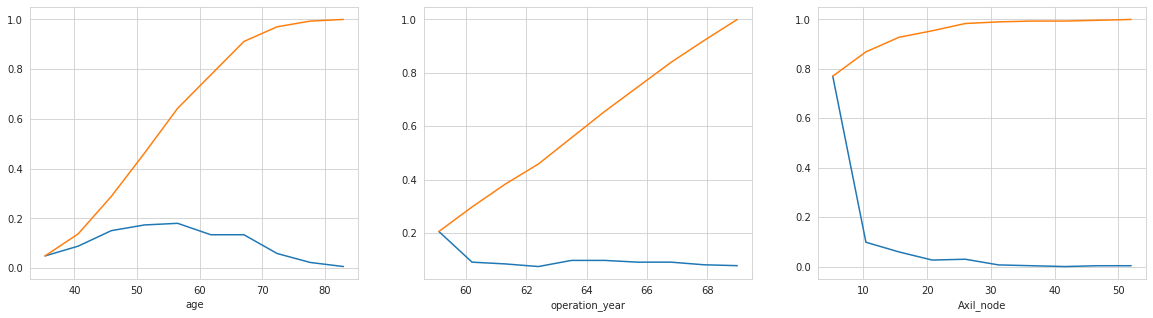

In [12]:
"""
The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.
"""

plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(Haberman_df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("[ "+feature+" ]")
    counts, bin_edges = np.histogram(Haberman_df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

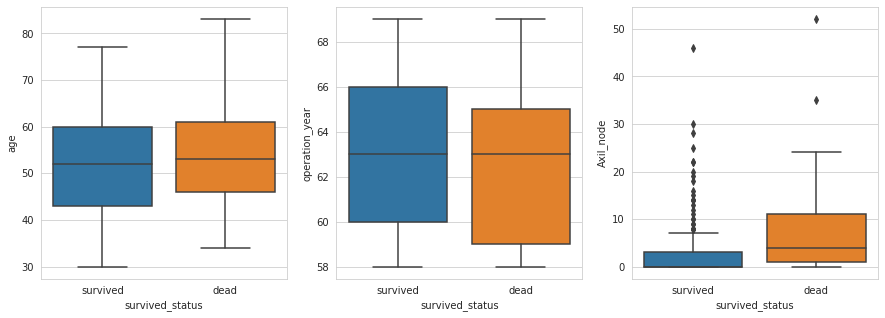

In [13]:
#5.3 Box Plots
"""
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5 * IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 - Q1
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(Haberman_df.columns)[:-1]):
    sns.boxplot( x='survived_status', y=feature, data=Haberman_df, ax=axes[idx])
plt.show()  

**Observations**

* The number of positive lymph nodes of the survivors is highly densed from 0 to 5.
* Almost 80% of the patients have less than or equal to 5 positive lymph nodea.
* The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1959 have the slighlty lower chance to surive that the rest.

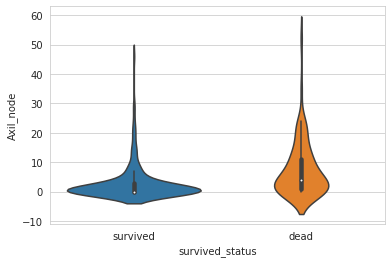

In [14]:
sns.violinplot(x='survived_status', y='Axil_node', data = Haberman_df, size = 9)
plt.show()

After taking a look at violin plot we can see that, the large number of patients who survived had 0 axil nodes or doesn't had it at all.

Patients and who died had axil node greater than or equal to 1, and as the concentration of axil node increases the repective patient is more likely to die.

# Final Conclusion

1. From this Dataset we can say that the majority of operations are performed on people age range between 38 and 68, where most of the points plotted on scatter plot (Operation_year vs Age)
1. We can see that there is quite good concentration of data point When axil_node is 0.
1. We can conclude that large number of operation were done in span of 7 years between 1960 and 1966 (Axil_nodes vs Operation_year)
1. Here with this scatter plot we get insight that patients with 0 axil nodes are more likely to survive irrespective to there age. (Axil_node vs Age)
1. It is very much less likely to have patients with axil nodes more than 30.
1. Patients who are older than 50 and have axil nodes greater than 10 are more likely to dead. 
1. Most of the operations which were done in year 1960-65 were unsuccessfull as most the patients died within 5 years after opertaion.
1. Patients having who have 0 axil nodes are more likely to survive
1. Patients within range of 45-65 and had axil node >= 1 are more likely to die.
1. People less than age 40 are more likely to survive though having axil node greater than or equal to 1
1. Box plot shows that, the more number of axil nodes, the more patients likely to die
1. The patients who had axil nodes from 1 to 24 are the majority of patients who died.
1. After taking a look at box plot we can see that, the large number of patients who survived had 0 axil nodes or doesn't had it at all.
1. Patients and who died had axil node greater than or equal to 1, and as the concentration of axil node increases the repective patient is more likely to die.


**References:**

1. https://www.kaggle.com/code/ashteotia/eda-on-haberman-survival-dataset?kernelSessionId=3494579
1. https://www.kaggle.com/code/gokulkarthik/haberman-s-survival-exploratory-data-analysis?kernelSessionId=2743116